In [3]:
# --- RANSAC Regression Boilerplate Code ---

# !pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- 1. Generate synthetic data ---
np.random.seed(42)
n, p = 100, 5
X = np.random.randn(n, p)
true_beta = np.array([1.5, -2.0, 0.5, 0, 0])

# Generate target with noise
y = X.dot(true_beta) + np.random.randn(n)

# Add outliers
n_outliers = int(0.1 * n)  # 10% outliers
outlier_indices = np.random.choice(n, n_outliers, replace=False)
y[outlier_indices] += np.random.uniform(10, 20, size=n_outliers)

In [5]:
# --- 2. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# --- 3. Fit RANSAC regression ---
ransac = RANSACRegressor(estimator=LinearRegression(),
                         min_samples=int(0.5 * n),  # minimum subset to fit model
                         residual_threshold=5.0,     # threshold for inlier
                         max_trials=100,             # number of iterations
                         random_state=42)
ransac.fit(X_train, y_train)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=42,
                residual_threshold=5.0)

In [7]:
# --- 4. Predictions ---
y_pred_train = ransac.predict(X_train)
y_pred_test = ransac.predict(X_test)


In [8]:
# --- 5. Evaluation ---
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train RMSE:", rmse_train, "MAE:", mae_train)
print("Test RMSE:", rmse_test, "MAE:", mae_test)
print("Estimated coefficients:", ransac.estimator_.coef_)
print("Intercept:", ransac.estimator_.intercept_)

Train RMSE: 4.802602535808049 MAE: 2.18358874273304
Test RMSE: 3.038352542260337 MAE: 1.3403861641266013
Estimated coefficients: [ 1.59843923 -1.9100983   0.53371044  0.02624906 -0.0021691 ]
Intercept: -0.13390584039359762


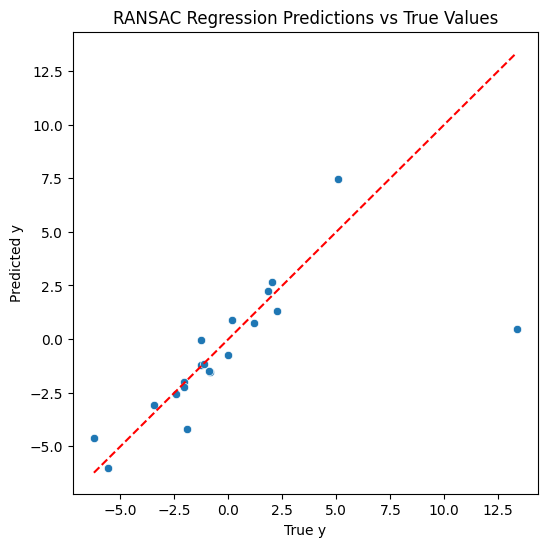

In [9]:

# --- 6. Visualization ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("RANSAC Regression Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
